### Hybrid: Merge + Insertion Sort

Suppose there is an input array, $A$, where $|A| = N$, that needs to be sorted in **ascending order**. Now, we also deine a threshold $S$

In this algorithm, you first execute the traditional merge sort algorithm onto $A$. Then, when the size of the subarray of $A$ is less than or equal to $S$, i.e.

$$
A_1 \subseteq A,   |A_1| \le S
$$,

the algorithm stopped decomposing the subarray and sort using the **Insertion Sort** algorithm instead.

---

#### 1. Insertion Sort

In [1]:
def insertion_sort(arr: list[int]):
    length = len(arr)
    comparison = 0
    
    for i in range(1, length):
        for j in range(i, 0, -1):
            comparison += 1
            if arr[j] <= arr[j-1]:
                arr[j-1], arr[j] = arr[j], arr[j-1]
            else:
                break
    return comparison,  arr

#UNIT TEST
arr = [0,1,4,3,2,2, 3, 10, 7, 8, 9, 11,13,12,17]
print(insertion_sort(arr))


(26, [0, 1, 2, 2, 3, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17])


#### 2. Hybrid Sort

Implement Merge sort when subarray has length > $S$, or else use insertion sort directly

In [2]:
def merge(left: list[int], right: list[int]):                                                                                                                                                
    comparison = 0
    pt_l, pt_r = 0, 0
    length_l, length_r = len(left), len(right)
    merged_arr = []
    while pt_l < length_l and pt_r < length_r:
        if left[pt_l] <= right[pt_r]:
            merged_arr.append(left[pt_l])
            pt_l += 1
        else:
            merged_arr.append(right[pt_r])
            pt_r += 1
        comparison += 1
    
    while pt_l < length_l:
        merged_arr.append(left[pt_l])
        pt_l += 1
    while pt_r < length_r:
        merged_arr.append(right[pt_r])
        pt_r += 1
    return comparison, merged_arr

In [3]:
def hybrid_sort(arr: list[int], S: int):
    length = len(arr)
    if length <= S:
        return insertion_sort(arr)
    mid = length // 2
    comp_left, left = hybrid_sort(arr[:mid], S)
    comp_right, right = hybrid_sort(arr[mid:], S)
    comp, res = merge(left, right)
    return comp_left + comp_right + comp, res

#UNIT TEST
arr = [0,1,4,3,2,2, 3, 10, 7, 8, 9, 11,13,12,17]
print(hybrid_sort(arr, 5))

(33, [0, 1, 2, 2, 3, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17])


#### 3. Merge Sort
Implement traditional merge sort

In [4]:
def merge_sort(arr: list[int]):
    length = len(arr)
    if length <= 1:
        return 0, arr
    mid = length // 2
    comp_left, left = merge_sort(arr[:mid])
    comp_right, right = merge_sort(arr[mid:])
    comp, res = merge(left, right)
    return comp_left + comp_right + comp, res

#UNIT TEST
arr = [0,1,4,3,2,2, 3, 10, 7, 8, 9, 11,13,12,17]
print(merge_sort(arr))

(34, [0, 1, 2, 2, 3, 3, 4, 7, 8, 9, 10, 11, 12, 13, 17])


---

#### 4. Testing Performance

##### 4.1. Generate Test Input

`input_generator`: generate `n` random input datasets of array of integer with range [1, `x`] with size `sz`

In [5]:
import random

In [6]:
def input_generator(sz: int, x: int, n: int = 1):
    arrs = []
    for i in range(n):
        arr = [random.randint(1, x) for _ in range(sz)]
        arrs.append(arr)
    return arrs

#UNIT TEST
print(input_generator(20, 99))

[[77, 93, 87, 24, 5, 27, 52, 93, 65, 3, 54, 20, 61, 66, 90, 2, 4, 37, 54, 78]]




We want to test for **the number of key comparisons of Hybrid Sort** by generating input arrays of size 1,000 to 1,000,000 data. Where for each size, we generate `n` inputs and then plug all these inputs into `hybrid_sort` function. To analyse this, we will use the **Matplotlib** library for visualization

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import time

##### 4.2 Testing with Fixed $S$ value over variable array sizes

In [8]:
def test_hybrid_sort(S, freq, arr_size_list): 
    comp_data = {}
    av_data = {}
    for i in arr_size_list:
        arrs = input_generator(i, 10000000, freq)
        comp_data[i] = []
        for arr in arrs:
            comp, _ = hybrid_sort(arr, S)
            comp_data[i].append(comp)
        comp_data[i] = np.array(comp_data[i])
        av_data[i] = np.average(comp_data[i])
    
    return comp_data, av_data
    

In [9]:
#CONSTANT
S = 20
freq = 5
arr_size_list=np.array([1000, 2000, 5000, 10000, 20000, 50000, 100000, 200000, 500000,\
        1000000, 2000000, 5000000, 10000000])

In [54]:
#Test the hybrid sort and obtain the key-comparison data
comp_data, av_data = test_hybrid_sort(S, freq, arr_size_list)

Through our theoretical analysis, we find out that the worst case theoretical complexity of this hybrid sort is: $O(nlog(\frac{n}{S}))$\
The overall detail of the theoretical analysis can be find in our presentation slide in the Github.

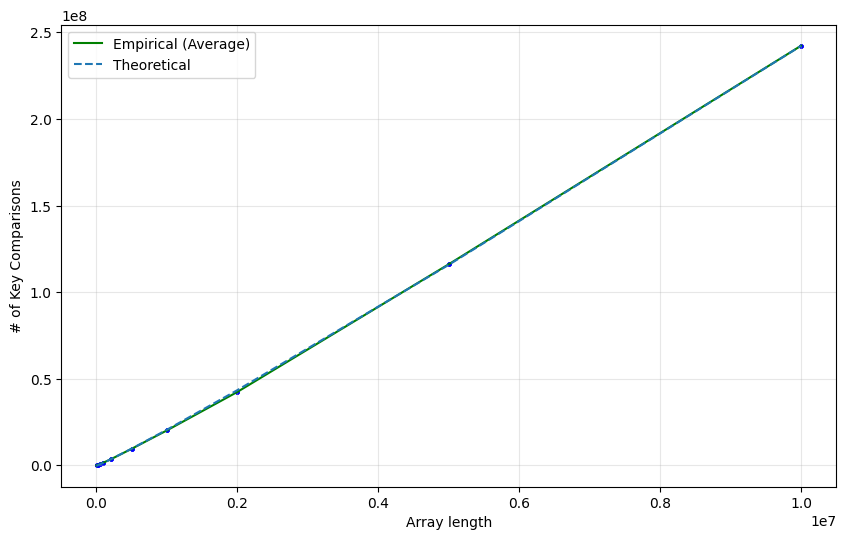

In [242]:
def plot_test_with_fixed_s(comp_data:dict, av_data:dict, arr_size_list:list[int]):
    x_points = arr_size_list
    coeff = np.polyfit(x_points*np.log(x_points), [i for i in av_data.values()], deg=1)
    fit = np.poly1d(coeff)    
    
    plt.figure(3,figsize=(10, 6))
    
    #Plot average key comparisons
    plt.plot(x_points, av_data.values(), label='Empirical (Average)', color='green', linestyle='-')  
    plt.plot(x_points, fit(x_points*np.log(x_points)), label='Theoretical', linestyle='--')
    
    #Plot the entire key comparisons data 
    #useful if you plot 5 or more datapoints per 1 point of array length (x-axis)
    for key in comp_data.keys():
        comp_x_points = [key for _ in range(len(comp_data[key]))]
        plt.scatter(comp_x_points, comp_data[key], color='b', alpha=0.6, s=5)

    plt.xlabel('Array length')
    plt.ylabel('# of Key Comparisons')
    plt.grid(alpha=0.3)
    plt.legend()
    plt.show()
    
plot_test_with_fixed_s(comp_data, av_data, arr_size_list)

##### 4.3. Testing with variable $S$ over different fixed array sizes

In [10]:
s_points = [i for i in range(2,129,2)]
s_power2_points = [2,4,8,16,32,64, 128]
arr_sizes = [1000, 5000, 10000, 100000, 1000000]

In [19]:
def test_hybrid_sort_variable_S(s_points, arr_tests):
    ave_comp_data = np.zeros((len(s_points),), dtype=np.float64)
    ave_time_data= np.zeros((len(s_points),), dtype=np.float64)
    
    for i, s in enumerate(s_points):
        temp_comp_data = np.zeros((len(arr_tests),), dtype=np.int64)
        temp_time_data = np.zeros((len(arr_tests),), dtype=np.float64)
        
        print(f"\nS={s} N={len(arr_tests[0])}")
        
        for idx, arr_test in enumerate(arr_tests):
            start = time.perf_counter()
            comp,_ = hybrid_sort(arr_test.copy(), s)
            end = time.perf_counter()
            temp_comp_data[idx] = comp
            temp_time_data[idx] = end - start
            
            print(f"idx={idx}\tcomp={comp}\tduration={(end-start)*1000}")
            
        del arr_test
        
        ave_comp_data[i] = np.mean(temp_comp_data)
        ave_time_data[i] = np.mean(temp_time_data)
        print(f"[Average] \tcomp={ave_comp_data[i]}\tduration={(ave_time_data[i] * 1000)}")
        print(f"[Std Error]\tcomp={np.std(temp_comp_data)}\tduration={np.std(temp_time_data * 1000)}")
    
    return np.array(ave_comp_data), np.array(ave_time_data)


In [238]:
length = len(arr_sizes)
comp_list = np.empty((length,), dtype=np.ndarray)
time_list = np.empty((length,), dtype=np.ndarray)
for i in range(length):
    arr_tests = input_generator(arr_sizes[i], 100000000, 10)
    comp_dt, time_dt = test_hybrid_sort_variable_S(s_points, arr_tests)
    print(f"Array size = {arr_sizes[i]} Done!" )
    comp_list[i] = comp_dt
    time_list[i] = time_dt
    
    del comp_dt, time_dt, arr_tests



S=2 N=1000
idx=0	comp=8722	duration=1.1563000152818859
idx=1	comp=8725	duration=0.8995999814942479
idx=2	comp=8716	duration=0.8959000115282834
idx=3	comp=8740	duration=0.9347000159323215
idx=4	comp=8692	duration=0.9710000013001263
idx=5	comp=8710	duration=1.0309999925084412
idx=6	comp=8717	duration=0.9069999796338379
idx=7	comp=8695	duration=0.9465999901294708
idx=8	comp=8727	duration=0.9332000045105815
idx=9	comp=8714	duration=0.9411000064574182
[Average] 	comp=8715.8	duration=0.9616399998776615

S=4 N=1000
idx=0	comp=8788	duration=0.8309000404551625
idx=1	comp=8771	duration=0.8264000061899424
idx=2	comp=8763	duration=0.8160999859683216
idx=3	comp=8792	duration=0.819800014141947
idx=4	comp=8773	duration=1.0080999927595258
idx=5	comp=8746	duration=0.8424000116065145
idx=6	comp=8778	duration=0.9696999914012849
idx=7	comp=8770	duration=0.8486000006087124
idx=8	comp=8782	duration=0.8391999872401357
idx=9	comp=8793	duration=0.8351999567821622
[Average] 	comp=8775.6	duration=0.863639998715

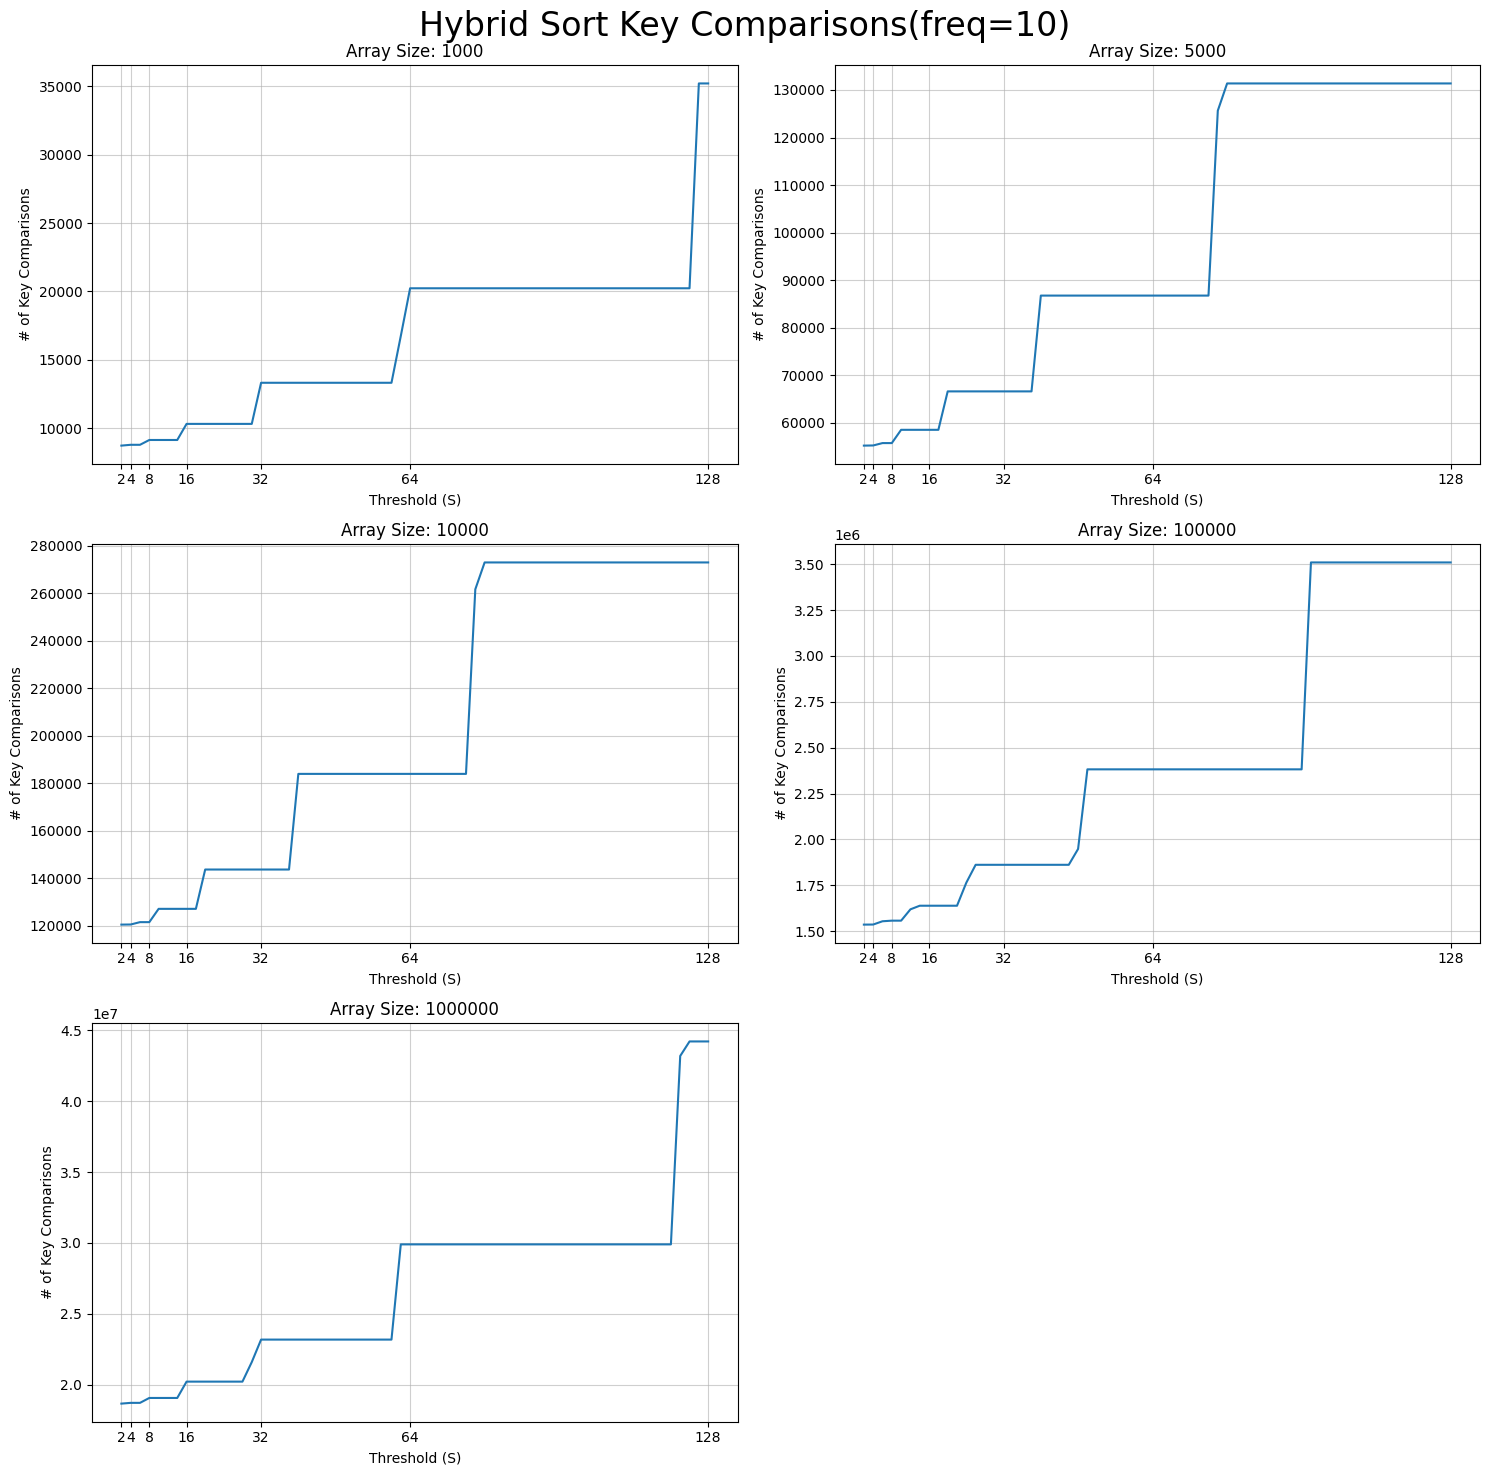

In [239]:
fig, axes = plt.subplots(math.ceil(length/2), 2, figsize=(15, 15))
axes = axes.flatten()

fig.suptitle("Hybrid Sort Key Comparisons(freq=10)", fontsize=24)
for i in range(length):
    axes[i].plot(s_points, comp_list[i])
    
    axes[i].set_xlabel('Threshold (S)')
    axes[i].set_ylabel('# of Key Comparisons')
    axes[i].set_title(f'Array Size: {arr_sizes[i]}')
    axes[i].grid(alpha=0.6)
    axes[i].set_xticks(s_power2_points)

axes[5].set_visible(False)

plt.tight_layout()
plt.show()

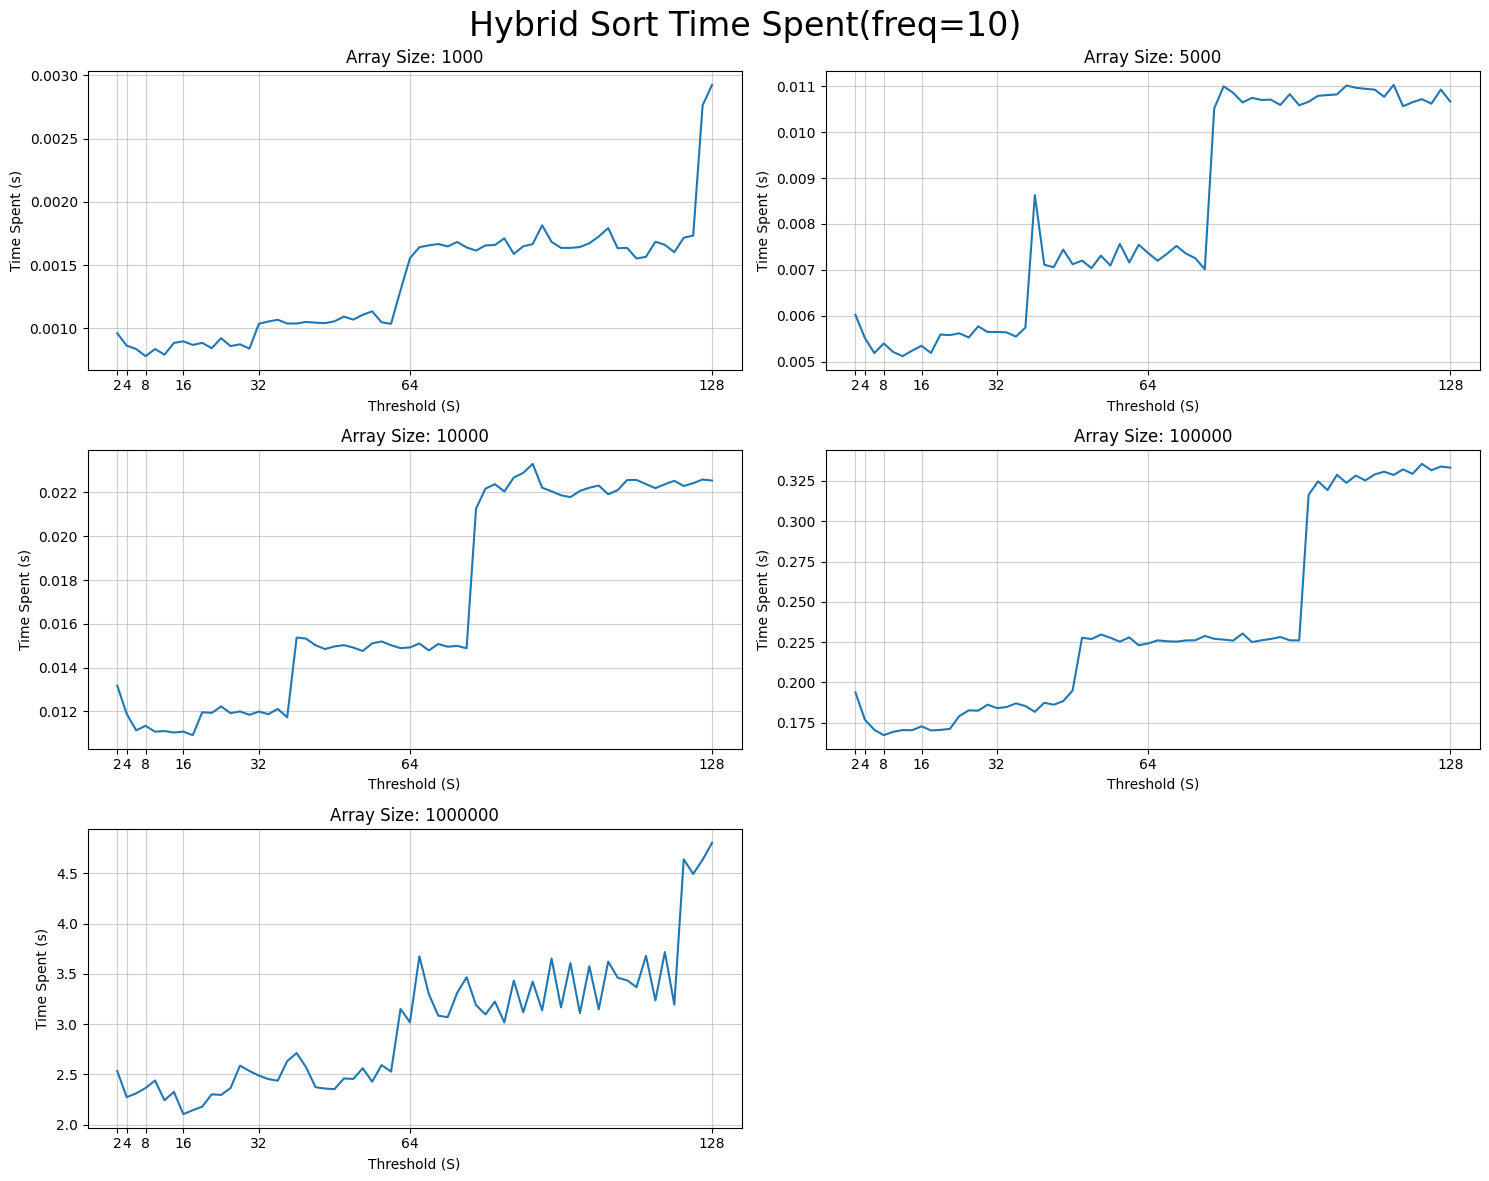

In [240]:
fig, axes = plt.subplots(math.ceil(length/2), 2, figsize=(15, 12))
axes = axes.flatten()
fig.suptitle("Hybrid Sort Time Spent(freq=10)", fontsize=24)
for i in range(length):
    axes[i].plot(s_points, time_list[i])
    axes[i].set_xlabel('Threshold (S)')
    axes[i].set_ylabel('Time Spent (s)')
    axes[i].set_title(f'Array Size: {arr_sizes[i]}')
    axes[i].grid(alpha=0.6)
    axes[i].set_xticks(s_power2_points)

axes[5].set_visible(False)

plt.tight_layout()
plt.show()


Trying out N = $10^7$ to get a better view of the algorithm performance, i.e. to make noise associated with Python's internal overhead less apparent.

In [12]:
def opt_input_generator(sz:int, x: int, n: int = 10):
    arrs = np.zeros((n, sz),dtype=int)
    for i in range(n):
        arr = np.random.randint(1, x+1, size=(sz,))
        arrs[i] = arr
    return arrs

#UNIT TEST
print(opt_input_generator(8, 99))

[[94 33 33 12 96 13 59 16]
 [37 79 73 61 93 94  7 56]
 [80 23 94 54 63 51  8 75]
 [25 72 27 21 88 32 13 90]
 [52 46 14 45 31 88 56 19]
 [26 49 58 24 90 27 75  8]
 [ 8 19  7 78  2 48 62 72]
 [96 25 15 56 21 82 55 57]
 [48 10 14 13 89 72 22 71]
 [76  6 63 15 30 49 58  5]]


In [ ]:
arr_large_tests = opt_input_generator(10000000, 10000000, 3)

In [ ]:
new_s_points = [2, 4, 8, 10, 12, 14, 16, 20, 24, 28, 32, 40, 48, 56, 64, 96, 112, 128]
comp_dt, time_dt = test_hybrid_sort_variable_S(new_s_points, arr_large_tests)


S=2 N=10000000
idx=0	comp=220101244	duration=41126.35050000972
idx=1	comp=220100726	duration=42103.5383999988
idx=2	comp=220105158	duration=41928.81579999812
[Average] 	comp=220102376.0	duration=41719.56823333554

S=4 N=10000000
idx=0	comp=220223701	duration=39399.89040000364
idx=1	comp=220222871	duration=39538.412800000515
idx=2	comp=220225217	duration=39780.84449999733
[Average] 	comp=220223929.66666666	duration=39573.049233333826

S=8 N=10000000
idx=0	comp=221109828	duration=39915.09860000224
idx=1	comp=221111304	duration=40598.11760002049
idx=2	comp=221113664	duration=39969.6871000051
[Average] 	comp=221111598.66666666	duration=40160.967766675945

S=10 N=10000000
idx=0	comp=226419623	duration=41021.63929998642
idx=1	comp=226414234	duration=42554.503999999724
idx=2	comp=226422718	duration=41786.148399987724
[Average] 	comp=226418858.33333334	duration=41787.43056665795

S=12 N=10000000
idx=0	comp=226419623	duration=43110.75370002072
idx=1	comp=226414234	duration=41464.48749999399
id

In [84]:
perf_df = pd.DataFrame({
    "S_val": new_s_points,
    "mean_key_comp": comp_dt,
    "mean_duration": time_dt,
})

perf_df.head()

,S_val,mean_key_comp,mean_duration
0,2,2.201024e+08,41.719568
1,4,2.202239e+08,39.573049
2,8,2.211116e+08,40.160968
3,10,2.264189e+08,41.787431
4,12,2.264189e+08,42.457592


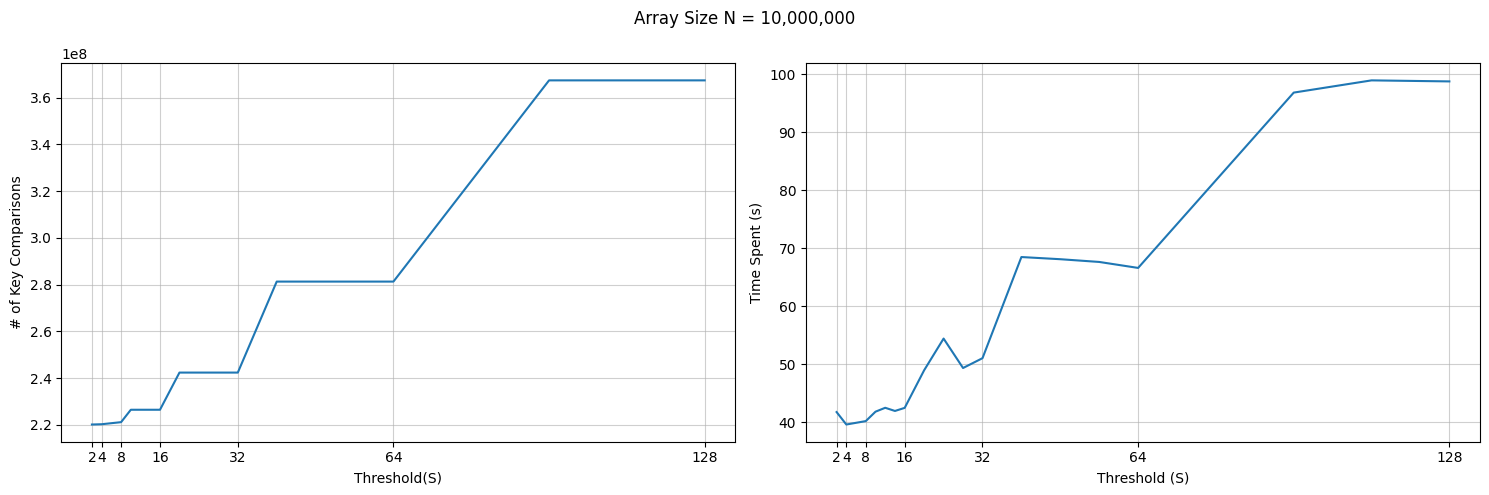

In [245]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))

fig.suptitle("Array Size N = 10,000,000")

axes[1].plot(perf_df['S_val'], perf_df['mean_duration'])
axes[1].set_xlabel('Threshold (S)')
axes[1].set_ylabel('Time Spent (s)')
axes[1].grid(alpha=0.6)
axes[1].set_xticks(s_power2_points)

axes[0].plot(perf_df['S_val'], perf_df['mean_key_comp'])
axes[0].set_xlabel('Threshold(S)')
axes[0].set_ylabel('# of Key Comparisons')
axes[0].grid(alpha=0.6)
axes[0].set_xticks(s_power2_points)

plt.tight_layout()
plt.show()

---

##### 5. Finding Optimal $S$ value

The main disadvantage of merge sort is the recursion overhead, while the disadvantage of insertion sort is the larger number of comparisons.

Choosing S values
- Small S -> Behave like merge sort -> higher recursion overhead
- Large S -> Behave like insertion sort -> higher number of comparisons</br>

So our goal is to find the sweet spot to balance the tradeoff.

**By Key Comparisons**\
As previously seen, we observe that the increase in threshold generally causes an increase to the number of key comparisons. So, picking a smaller value of S will be beneficial in terms of key comparison. However, this would mean that we would take S=2 and this has no difference with merge sort at all. Instead of looking at key comparisons we will be looking more on the duration aspect as this will reflect the both the recursion and key comparisons overhead, providing clearer insight on the algorithm performance.

**By Time Spent**\
Looking at the time duration, $8 \le S \le 16$ seems to yield the minimal duration across different array sizes. So, here we will be using 8 and 16 as the candidate optimal values.



In [15]:
arr_large_tests = opt_input_generator(10000000, 10000000, 30)

In [20]:
temp_s_pts = [8, 16]
t1, t2 = test_hybrid_sort_variable_S(temp_s_pts, arr_large_tests)



S=8 N=10000000
idx=0	comp=221109833	duration=32345.02000000066
idx=1	comp=221109920	duration=32816.90940000408
idx=2	comp=221107262	duration=33756.533200001286
idx=3	comp=221107620	duration=33401.315399998566
idx=4	comp=221109578	duration=34496.11589999404
idx=5	comp=221111987	duration=32703.69130000472
idx=6	comp=221110833	duration=33768.476900004316
idx=7	comp=221110934	duration=32698.126099996443
idx=8	comp=221112576	duration=33142.121099997894
idx=9	comp=221107224	duration=32902.20890000637
idx=10	comp=221104650	duration=33251.31210000109
idx=11	comp=221105868	duration=33193.321200000355
idx=12	comp=221109244	duration=34936.86380000145
idx=13	comp=221111793	duration=34574.18219999818
idx=14	comp=221108079	duration=34334.67530000053
idx=15	comp=221108316	duration=32874.38870000187
idx=16	comp=221110188	duration=33240.03850000008
idx=17	comp=221104553	duration=32782.14709999884
idx=18	comp=221105845	duration=34413.18350000074
idx=19	comp=221107285	duration=34307.24480000208
idx=20	c

Outputs gained from the randomly generated datasets (both test for S = 8 and S = 16 uses same datasets)

| S | Key Comparisons (Avg) | Key Comparisons (SE) | Duration (ms) (Avg) | Duration (ms) (SE) |
|---|----------------------|---------------------|-------------------|------------------|
| 8 | 221,108,560.27 | 2,446.83 | 33,674.15 | 801.11 |
| 16 | 226,418,451.13 | 3,149.70 | 36,141.79 | 801.49 |


Here we see that both S=8 and S=16 only has a slight difference in the performance and both also had relatively small standard error. Since there isn't a significant difference and both can sometimes better than one another (can be seen in the previous plots) depending on the datasets and the machine performance, we can't confidently conclude that either S = 16 or S = 8 is the most optimal. So, we pick both of them as the optimal value, instead.

`Optimal Value S = 8, 16`

---

#### 6. Comparison with Traditional Merge Sort

To test it, we will use the array size $N = 10^7$

In [ ]:
def test_merge_sort(arr_tests):
    comp_data = np.zeros((len(arr_tests),), dtype=np.int64)
    time_data = np.zeros((len(arr_tests),), dtype=np.float64)
    
    for idx, arr_test in enumerate(arr_tests):
        start = time.perf_counter()
        comp,_ = merge_sort(arr_test.copy())
        comp_data[idx] = comp
        end = time.perf_counter()
        time_data[idx] = end - start
        
        print(f"idx={idx}\tcomp={comp}\tduration(ms)={(end-start)*1000}")
        
    del arr_test
    ave_comp, ave_time = np.mean(comp_data), np.mean(time_data)
    del comp_data, time_data
    
    return ave_comp, ave_time

In [ ]:
comp_merge, time_merge = test_merge_sort(arr_large_tests,3)
print("Merge Sort Performance (Frequency = 3)" )
print('Average Comparisons: ', comp_merge, '\nAverage Duration:', time_merge)

10
idx=0	comp=220100112	duration(ms)=43259.20619998942
idx=1	comp=220104641	duration(ms)=41940.22940000286
idx=2	comp=220099034	duration(ms)=41874.36780001735
Merge Sort Performance (Frequency = 3)
Average Comparisons:  220101262.33333334 
Average Duration: 42.35793446666988


In [171]:
print(len(arr_large_tests[0]))

10000000


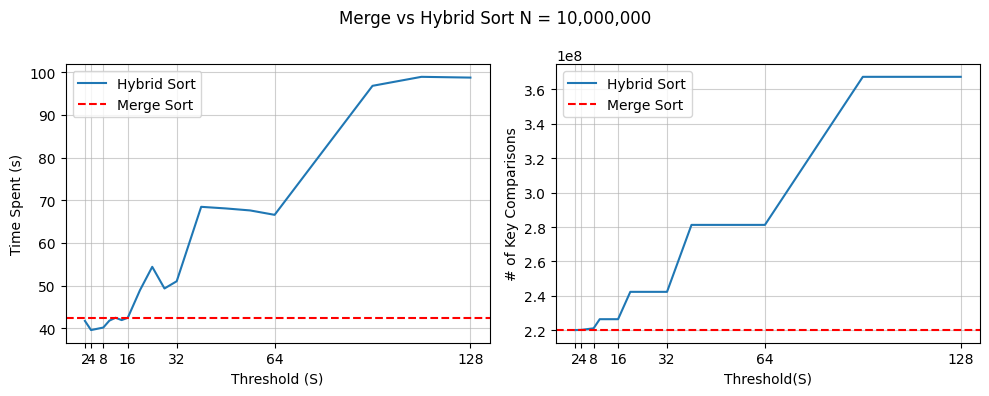

In [168]:
fig, axes = plt.subplots(1,2, figsize=(10, 4))

fig.suptitle("Merge vs Hybrid Sort N = 10,000,000")

axes[0].plot(perf_df['S_val'], perf_df['mean_duration'], label="Hybrid Sort")
axes[0].axhline(y=time_merge, label="Merge Sort", linestyle='--', color='red')
axes[0].set_xlabel('Threshold (S)')
axes[0].set_ylabel('Time Spent (s)')
axes[0].grid(alpha=0.6)
axes[0].set_xticks(s_power2_points)
axes[0].legend()

axes[1].plot(perf_df['S_val'], perf_df['mean_key_comp'], label="Hybrid Sort")
axes[1].axhline(y=comp_merge, label="Merge Sort", linestyle='--', color='red')
axes[1].set_xlabel('Threshold(S)')
axes[1].set_ylabel('# of Key Comparisons')
axes[1].grid(alpha=0.6)
axes[1].set_xticks(s_power2_points)
axes[1].legend()

plt.tight_layout()
plt.show()

Looking at the data at $S = 16$ and $S = 8$

In [179]:
print("S =", new_s_points[2])
print('Type\t\tKey Comp.\tDuration(s)')
print("-"*48)
print(f'Hybrid Sort\t{perf_df['mean_key_comp'][2]:.2f}\t{perf_df['mean_duration'][2]:.2f}')
print(f'Merge Sort\t{comp_merge:.2f}\t{time_merge:.2f}')

print("\nS =", new_s_points[6])
print('Type\t\tKey Comp.\tDuration(s)')
print("-"*48)
print(f'Hybrid Sort\t{perf_df['mean_key_comp'][6]:.2f}\t{perf_df['mean_duration'][6]:.2f}')
print(f'Merge Sort\t{comp_merge:.2f}\t{time_merge:.2f}')

S = 8
Type		Key Comp.	Duration(s)
------------------------------------------------
Hybrid Sort	221111598.67	40.16
Merge Sort	220101262.33	42.36

S = 16
Type		Key Comp.	Duration(s)
------------------------------------------------
Hybrid Sort	226418858.33	42.44
Merge Sort	220101262.33	42.36
